<a href="https://colab.research.google.com/github/Steivann/tugas-data-mining/blob/main/Steivan-0706022210038-Week6-PIMA%20Indians%20Diabetes%20Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRATIKUM WEEK 6**


Nama : Steivan Henry Octavian


Nim : 0706022210038

**PIMA Indians Diabetes Database**

In [2]:
#Ini merupakan code code untuk mengimport library dari python
import pandas as pd #library pandas yang berfungsi untuk manipulasi dan analisis data
import numpy as np #numpy yang berfungsi untuk komputasi array dan operasi matematika.
import matplotlib.pyplot as plt #yang berfungsi untuk membuat visualisasi data dalam bentuk grafik.
import seaborn as sns #untuk visualisasi data yang lebih informatif, dibangun di atas Matplotlib.
from sklearn.preprocessing import LabelEncoder  #untuk mengubah data kategorikal menjadi numerik.
from sklearn.model_selection import train_test_split  #untuk membagi dataset menjadi bagian training dan testing.
from sklearn.tree import DecisionTreeClassifier  #untuk membuat model klasifikasi berbasis pohon keputusan.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # untuk mengimpor metrik evaluasi model, yaitu akurasi, matriks kebingungan, dan laporan klasifikasi.
from sklearn import tree  #tree, yang menyediakan fungsi tambahan untuk visualisasi pohon keputusan.
from sklearn.naive_bayes import GaussianNB  #untuk membuat model klasifikasi Naive Bayes khususnya untuk data kontinu.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/diabetes.csv') #untuk membaca dan menyimpan url pada github dalam variabel df
df.head(10) #untuk memunculkan data dari isi dataset sebanyak 10
#Ini merupakan code  pembacaan data dari url dataset yang disimpan di github dan df head berarti menampilkan 10 datanya

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.describe()
# INi merupakan code untuk memberikan deskripsi atau ringkasan dari dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()
#Ini merupakan code yang memberikan ringkasan tentang struktur DataFrame. seperti informasi mengenai index, nama kolom dll

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()
#Ini merupakan sebuah code untuk menghitung jumblah nilai kosongdi setiap kolom dataframe.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


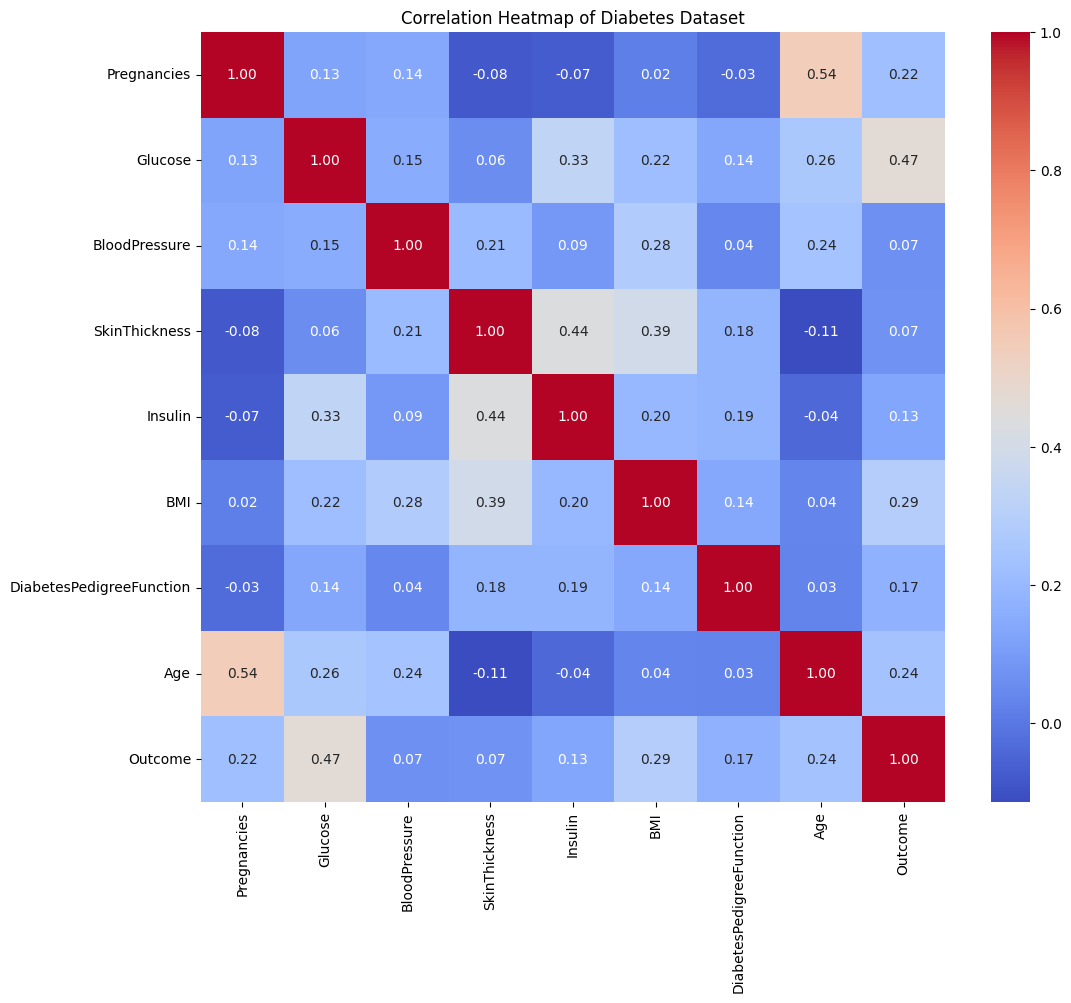

In [9]:
plt.figure(figsize=(12, 10))  # untuk mengatur ukuran gambar atau visualisasi heatmap menjadi lebar 12 inci dan tinggi 10 inci.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # untuk membuat heatmap dari korelasi antar kolom:
    # `df.corr()` menghitung korelasi antar kolom numerik dalam DataFrame `df`.
    # `annot=True` menampilkan nilai korelasi pada setiap sel di heatmap.
    # `cmap='coolwarm'` mengatur skema warna, dengan 'cool' (biru) untuk korelasi negatif dan 'warm' (merah) untuk korelasi positif.
    # `fmt=".2f"` menentukan format angka dalam heatmap, yaitu 2 desimal.
plt.title('Correlation Heatmap of Diabetes Dataset')  # untuk menambahkan judul pada heatmap untuk menjelaskan isi grafik.
plt.show()  #Menampilkan heatmap yang telah dibuat.
#Heatmap korelasi ini menunjukkan bahwa Glucose dan BMI memiliki hubungan positif yang kuat dengan Outcome (diabetes),
#mengindikasikan bahwa nilai yang lebih tinggi pada fitur-fitur ini meningkatkan risiko diabetes.
#korelasi lain seperti BloodPressure memiliki korelasi rendah dengan Outcome, sehingga pengaruhnya dalam prediksi diabetes lebih kecil.

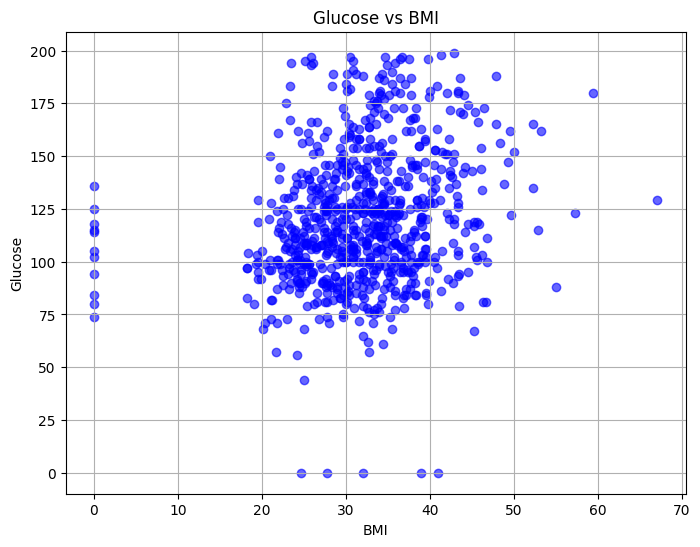

In [14]:
plt.figure(figsize=(8, 6))  #untuk mengatur ukuran visualisasi menjadi lebar 8 inci dan tinggi 6 inci.
plt.scatter(df['BMI'], df['Glucose'], color='blue', alpha=0.6)  # untuk membuat scatter plot:
    # `df['BMI']`  nilai BMI pada sumbu X.
    # `df['Glucose']`  nilai kadar glukosa pada sumbu Y.
    # `color='blue'`  warna biru pada titik-titik plot.
    # `alpha=0.6`  transparansi titik-titik menjadi 60%, sehingga area yang padat lebih jelas.
plt.title('Glucose vs BMI')  # judul pada plot untuk menjelaskan bahwa ini adalah hubungan antara Glucose dan BMI.
plt.xlabel('BMI')  # label sumbu X yang menggambarkan BMI.
plt.ylabel('Glucose')  # label sumbu Y yang menggambarkan kadar Glucose.
plt.grid(True)  # grid untuk membantu visualisasi dan pembacaan data.
plt.show()  # scatter plot yang telah dibuat.

# Sumbu X (BMI): Mengukur Body Mass Index (indeks massa tubuh), indikator apakah seseorang memiliki berat badan ideal, kurang, atau obesitas.
# Sumbu Y (Glucose): Mengukur kadar glukosa darah, yang berhubungan erat dengan diabetes.
# Scatter plot menunjukkan bahwa ada kecenderungan hubungan positif antara BMI dan Glucose: orang dengan BMI lebih tinggi cenderung memiliki kadar Glucose lebih tinggi,
#Hubungan ini memperkuat pentingnya BMI dan Glucose dalam menganalisis risiko diabetes.

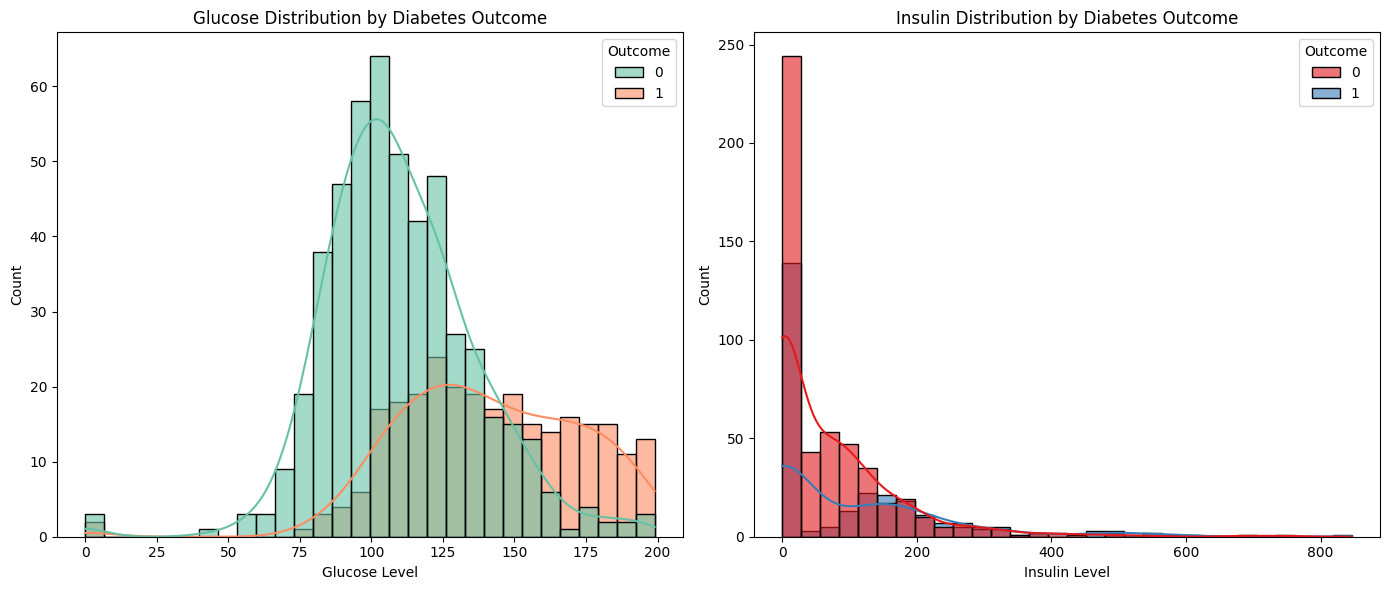

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # untuk membuat dua subplot berdampingan dengan ukuran total lebar 14 inci dan tinggi 6 inci.

# Plot pertama untuk distribusi Glucose berdasarkan Outcome
sns.histplot(data=df, x='Glucose', hue='Outcome', bins=30, kde=True, ax=axes[0], palette='Set2', alpha=0.6)
    # `data=df`:  data dari DataFrame `df`.
    # `x='Glucose'`:  nilai Glucose di sumbu X.
    # `hue='Outcome'`: Membagi histogram berdasarkan Outcome (diabetes atau tidak).
    # `bins=30`: Membagi data Glucose menjadi 30 bin atau kategori.
    # `kde=True`: Menambahkan garis KDE (Kernel Density Estimation) untuk memperlihatkan distribusi.
    # `ax=axes[0]`: Mengarahkan plot ke subplot pertama.
    # `palette='Set2'`: palet warna Set2 untuk membedakan Outcome.
    # `alpha=0.6`: Mengatur transparansi menjadi 60% untuk meningkatkan visibilitas.
axes[0].set_title('Glucose Distribution by Diabetes Outcome')  # judul plot untuk memperjelas bahwa ini adalah distribusi Glucose.
axes[0].set_xlabel('Glucose Level')  # Label sumbu X sebagai "Glucose Level".
axes[0].set_ylabel('Count')  # Label sumbu Y sebagai "Count".

# Plot kedua untuk distribusi Insulin berdasarkan Outcome
sns.histplot(data=df, x='Insulin', hue='Outcome', bins=30, kde=True, ax=axes[1], palette='Set1', alpha=0.6)
    # Menggunakan parameter yang sama untuk visualisasi distribusi Insulin.
axes[1].set_title('Insulin Distribution by Diabetes Outcome')  # Judul plot untuk distribusi Insulin.
axes[1].set_xlabel('Insulin Level')  # Label sumbu X sebagai "Insulin Level".
axes[1].set_ylabel('Count')  # Label sumbu Y sebagai "Count".

plt.tight_layout()  # Mengoptimalkan layout agar subplot tidak saling bertumpukan.
plt.show()  # Menampilkan histogram yang telah dibuat.
#Sesuai dengan grafik historgam Glucose dan Insulin berdasarkan Outcome menunjukkan bahwa orang dengan diabetes cenderung memiliki tingkat Glucose dan Insulin lebih tinggi dibandingkan yang tidak.
#Glucose menunjukkan pemisahan yang lebih jelas antara orang yang terkena diabetes dan non-diabetes.

SPLIT DATA

In [22]:
x = df.drop(['Outcome'], axis=1)  # untuk menghapus kolom 'Outcome' dari DataFrame dan menyimpannya sebagai variabel x.
y = df['Outcome']  # untuk enyimpan kolom 'Outcome' sebagai target variabel y.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # untuk membagi data menjadi data pelatihan (train) dan data pengujian (test)

#x dan y: Merupakan data fitur dan target yang akan dibagi.
#test_size=0.2: Menentukan bahwa 20% dari data akan digunakan sebagai data testing, sementara 80% sisanya akan menjadi data training.
#random_state=42: Mengatur seed untuk pengacakan data. Dengan menetapkan nilai ini, pembagian data akan konsisten setiap kali kode dijalankan.

In [24]:
x_train.shape, x_test.shape # untuk menampilkan bentuk jumlah baris dan kolom dari data (x_train) dan data uji (x_test). dan untuk memastikan bahwa data telah dibagi dengan benar dan untuk memahami ukuran masing-masing dataset.

((614, 8), (154, 8))

DECISION TREE

In [26]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0) #untuk membuat model Decision Tree dengan parameter tertentu
#criterion = 'entropy':  menentukan bagaimana model akan mengukur kualitas pemisahan data di setiap node pohon.
#max_depth = 3: Parameter ini membatasi kedalaman (jumlah level) pohon keputusan.
#random_state = 0: Parameter ini memastikan bahwa hasil pelatihan model akan konsisten setiap kali kode dijalankan.
clf_entropy.fit(x_train, y_train) # untuk melatih model menggunakan data pelatihan

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [28]:
y_pred_entropy = clf_entropy.predict(x_test) # untuk menggunakan model Decision Treeuntuk membuat prediksi pada data uji (x_test) dan menyimpan prediksi tersebut ke dalam variabel y_pred_entropy.

In [30]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entropy))) #untuk menampilkan akurasi model Decision Tree yang telah dibuat menggunakan kriteria 'entropy'

Model accuracy score with criterion entropy: 0.7662


In [32]:
print('Training set score: {0:0.4f}' .format(clf_entropy.score(x_train, y_train))) #untuk menampilkanskor (akurasi) model Decision Tree
print('Test set score: {0:0.4f}' .format(clf_entropy.score(x_test, y_test))) #untuk menampilkan skor (akurasi) model Decision Tree pada data uji.

Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

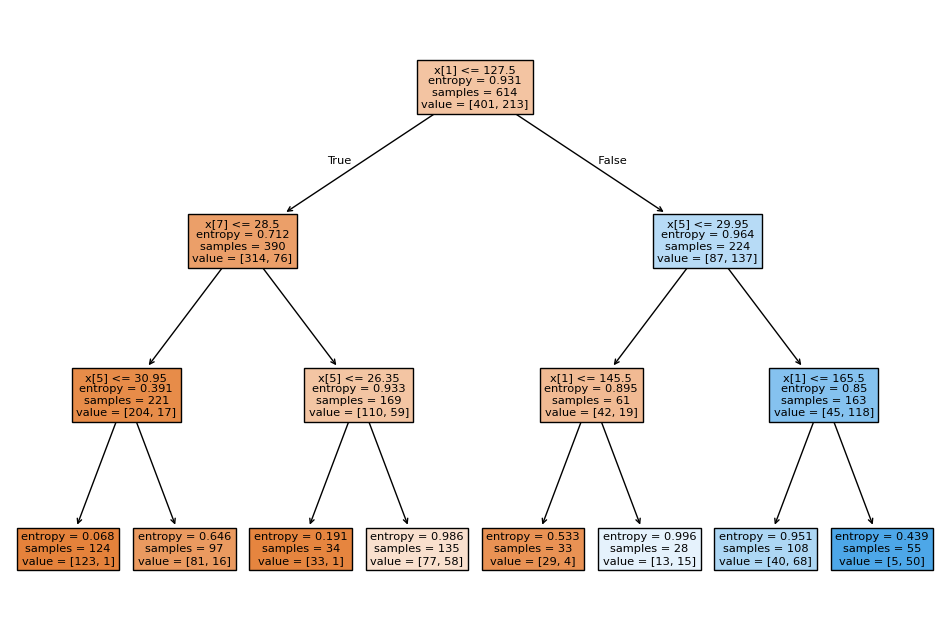

In [34]:
plt.figure(figsize = (12,8)) #untuk mengatur ukuran gambar menjadi lebar 12 inci dan tinggi 8 inci.
tree.plot_tree(clf_entropy.fit(x_train, y_train), filled = True) #untuk membuat visualisasi pohon keputusan dari model Decision Tree yang telah dilatih.

CRITERION GINI INDEX

In [36]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0) #untuk membuat DecisionTreeClassifier baru dan menyimpannya dalam variabel clf_gini
clf_gini.fit(x_train, y_train) #untuk melatih model Decision Tree menggunakan data pelatihan.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [37]:
y_pred_gini = clf_gini.predict(x_test) #menggunakan model Decision Tree clf_gini untuk memprediksi hasil berdasarkan data uji x_test, dan menyimpan prediksi tersebut dalam variabel y_pred_gini.

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #untuk menampilkan akurasi model Decision Tree yang telah dibuat menggunakan kriteria 'gini index'

In [38]:
print('Training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train))) #untuk menampilkan akurasi model Decision Tree clf_gini pada data pelatihan (x_train, y_train).
print('Test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test))) #untuk menampilkan skor (akurasi) model Decision Tree pada data pelatihan dan data uji.


Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

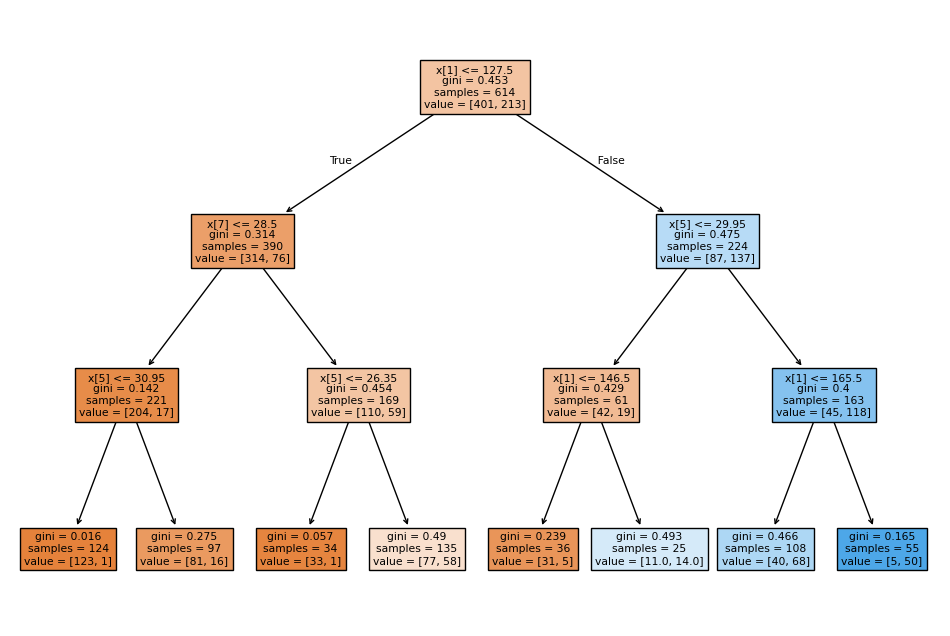

In [39]:
plt.figure(figsize = (12,8)) #Membuat figur (area plot) dengan ukuran 12x8 inci.
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True) #menampilkan visualisasi pohon keputusan

**Confusion matrix and classification report of criterion Entropy and Gini index**

In [40]:
entropi = confusion_matrix(y_test, y_pred_entropy) # untuk menghitung confusion matrix untuk model dengan kriteria 'entropy' dan menyimpannya di variabel entropi.
gini = confusion_matrix(y_test, y_pred_gini)# untuk menghitung confusion matrix untuk model dengan kriteria 'gini' dan menyimpannya di variabel gini.
print('Confusion matrix entropy: \n', entropi)# Menampilkan confusion matrix untuk model 'entropy'.
print('Confusion matrix gini index: \n', gini)# Menampilkan confusion matrix untuk model 'gini'.

Confusion matrix entropy: 
 [[83 16]
 [20 35]]
Confusion matrix gini index: 
 [[83 16]
 [21 34]]


In [42]:
print('Classification Report Entropy') # judul untuk laporan model 'entropy'.
print(classification_report(y_test, y_pred_entropy))# Menghitung dan menampilkan classification report untuk model 'entropy'.
print('Classification Report Gini Index')# judul untuk laporan model 'gini'.
print(classification_report(y_test, y_pred_gini))#Menghitung dan menampilkan classification report untuk model 'gini'.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



**Naive Bayes**

In [43]:
x_train = x_train.dropna() #untuk menghapus baris dengan nilai kosong (NaN) dari x_train.
y_train = y_train[x_train.index] # untuk memastikan y_train hanya berisi target yang sesuai dengan data x_train setelah penghapusan NaN.

nb_classifier = GaussianNB() # untuk membuat model Naive Bayes (GaussianNB).
nb_classifier.fit(x_train, y_train)# untuk melatih model Naive Bayes menggunakan data pelatihan yang telah dibersihkan.

GaussianNB()

In [44]:
nb_y_pred = nb_classifier.predict(x_test)#untuk menggunakan model Naive Bayes (nb_classifier) yang telah dilatih untuk membuat prediksi pada data uji (x_test) dan menyimpan hasilnya di variabel nb_y_pred.

In [45]:
print('Accuracy Score with GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))#Menampilkan akurasi model Naive Bayes pada data uji.

Gauss = confusion_matrix(y_test, nb_y_pred)# Menghitung dan menyimpan confusion matrix untuk model Naive Bayes.
print('Confusion matrix GaussianNB: \n', Gauss)#Menampilkan confusion matrix.

print('Training set score: {0:0.4f}' .format(nb_classifier.score(x_train, y_train)))#Menampilkan skor (akurasi) model pada data pelatihan.
print('Test set score: {0:0.4f}' .format(nb_classifier.score(x_test, y_test)))#Menampilkan skor (akurasi) model pada data uji.

Accuracy Score with GaussianNB: 0.8
Confusion matrix GaussianNB: 
 [[79 20]
 [16 39]]
Training set score: 0.7524
Test set score: 0.7662


In [46]:
print('Classification Report GaussianNB') #Menampilkan judul untuk classification report.
print(classification_report(y_test, nb_y_pred)) #Menghitung dan menampilkan classification report untuk model Naive Bayes menggunakan target sebenarnya (y_test) dan prediksi model (nb_y_pred).
#Conclusion
#Naive Bayes memiliki akurasi keseluruhan yang mungkin sedikit lebih rendah dari logistic regression. Pada prediksi untuk kelas 0 (tidak diabetes), model ini dapat menunjukkan presisi, recall, dan F1-score yang cukup baik, tetapi biasanya lebih rendah dibandingkan logistic regression. Untuk kelas 1 (diabetes), model Naive Bayes sering kali memiliki presisi dan recall yang lebih rendah, yang menunjukkan bahwa model ini cenderung lebih sering salah dalam mengidentifikasi individu dengan diabetes.

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



**LOGISTIC REGGRESION**

In [48]:
from sklearn.linear_model import LogisticRegression #Mengimpor kelas LogisticRegression dari library sklearn.
model = LogisticRegression(max_iter=1000) #Membuat objek model Logistic Regression dengan nama model dan menetapkan max_iter=1000
model.fit(x_train, y_train) #Melatih model Logistic Regression menggunakan data pelatihan x_train dan target y_train.


LogisticRegression(max_iter=1000)

In [56]:
y_pred_log = model.predict(x_test) #untuk Membuat prediksi menggunakan model Logistic Regression (model) pada data uji (x_test) dan menyimpan hasilnya di y_pred_log.
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log}) # untuk membuat DataFrame Pandas bernama comparison_table yang berisi dua kolom: "y_test" (target sebenarnya) dan "y_pred" (prediksi model).
print(comparison_table.head()) #untuk Menampilkan 5 baris pertama dari comparison_table untuk melihat perbandingan antara target sebenarnya dan prediksi model.


     y_test  y_pred
668       0       0
324       0       0
624       0       0
690       0       0
473       0       0


In [57]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) #untuk menampilkan seberapa akurat model Logistic Regression dalam memprediksi hasil

Accuracy Score: 0.7468


In [60]:
conf_matrix = confusion_matrix(y_test, y_pred) # untuk menghitung confusion matrix menggunakan target sebenarnya (y_test) dan prediksi model (y_pred), lalu menyimpannya di variabel conf_matrix.
print("Confusion Matrix:\n", conf_matrix) #untuk menampilkan confusion matrix ke konsol.

Confusion Matrix:
 [[78 21]
 [18 37]]


In [61]:
print(classification_report(y_test, y_pred_log)) #menampilkan classification report untuk mengevaluasi kinerja model Logistic Regression secara rinci
#conclusion
# logistic regression memiliki akurasi keseluruhan sebesar 0,75. Model ini menunjukkan kinerja yang lebih baik dalam memprediksi kelas 0 (tidak diabetes), dengan nilai presisi 0,81, recall 0,79, dan F1-score 0,80. Untuk kelas 1 (diabetes), model memiliki presisi lebih rendah yaitu 0,64, recall sebesar 0,67, dan F1-score 0,65.

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

